In [2]:
import numpy as np
import pandas as pd

from src import utils
from src.detect.detect_utils import OnsetMaker
from src.features.rhythm_features import BeatUpbeatRatio

C:\Python Projects\jazz-corpus-analysis\venv\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
# Upper and lower bounds to use when thresholding BURs
BUR_UPPER = 4.0
BUR_LOWER = 0.25

In [4]:
onsets: list[OnsetMaker] = utils.unserialise_object(fr'{utils.get_project_root()}\models\matched_onsets_corpus_chronology')

In [5]:
float_round = lambda x: round(0.05 * round(x / 0.05), 2)

res = {}
# Iterate through each track
for num, track in enumerate(onsets, 1):
    print(f'{num} / {len(onsets)}')
    # Convert the summary dictionary (dictionary of arrays) to a dataframe
    if track.item['pianist'] not in ['Bud Powell']:
        continue
    summary_dict = pd.DataFrame(track.summary_dict)
    # Iterate through each instrument
    for instr in utils.INSTRUMENTS_TO_PERFORMER_ROLES.keys():
        # Subset to get my onsets and partner onsets as separate dataframes
        my_onsets = track.ons[instr]
        my_beats = summary_dict[instr]
        # Extract BURs using our feature class
        bm = BeatUpbeatRatio(my_onsets=my_onsets, my_beats=my_beats, clean_outliers=False)
        # Iterate through every log BUR by that musician
        burs = [round(i, 1) if not np.isnan(i) else i for i in bm.bur['burs'].values]
        for bur1, bur2, nextbur in zip(burs, burs[1:], burs[2:]):
            if any(np.isnan(b) for b in [bur1, bur2, nextbur]):
                continue
            if not all(1 <= b <= BUR_UPPER for b in [bur1, bur2, nextbur]):
                continue
            if f'{bur1}_{bur2}' not in res.keys():
                res[f'{bur1}_{bur2}'] = []
            res[f'{bur1}_{bur2}'].append(nextbur)

1 / 300
2 / 300
3 / 300
4 / 300
5 / 300
6 / 300
7 / 300
8 / 300
9 / 300
10 / 300
11 / 300
12 / 300
13 / 300
14 / 300
15 / 300
16 / 300
17 / 300
18 / 300
19 / 300
20 / 300
21 / 300
22 / 300
23 / 300
24 / 300
25 / 300
26 / 300
27 / 300
28 / 300
29 / 300
30 / 300
31 / 300
32 / 300
33 / 300
34 / 300
35 / 300
36 / 300
37 / 300
38 / 300
39 / 300
40 / 300
41 / 300
42 / 300
43 / 300
44 / 300
45 / 300
46 / 300
47 / 300
48 / 300
49 / 300
50 / 300
51 / 300
52 / 300
53 / 300
54 / 300
55 / 300
56 / 300
57 / 300
58 / 300
59 / 300
60 / 300
61 / 300
62 / 300
63 / 300
64 / 300
65 / 300
66 / 300
67 / 300
68 / 300
69 / 300
70 / 300
71 / 300
72 / 300
73 / 300
74 / 300
75 / 300
76 / 300
77 / 300
78 / 300
79 / 300
80 / 300
81 / 300
82 / 300
83 / 300
84 / 300
85 / 300
86 / 300
87 / 300
88 / 300
89 / 300
90 / 300
91 / 300
92 / 300
93 / 300
94 / 300
95 / 300
96 / 300
97 / 300
98 / 300
99 / 300
100 / 300
101 / 300
102 / 300
103 / 300
104 / 300
105 / 300
106 / 300
107 / 300
108 / 300
109 / 300
110 / 300
111 / 30

In [6]:
print(res)

{'1.1_2.2': [1.6, 1.7], '2.2_1.6': [1.8], '2.1_2.9': [1.9], '1.8_1.8': [1.1, 1.5], '2.6_3.4': [2.2], '1.4_1.8': [2.3, 3.5, 2.0, 1.7, 1.4, 1.1], '1.8_2.3': [2.8, 1.6, 1.8, 2.1, 1.2, 2.5], '2.3_2.8': [2.3], '2.1_1.3': [2.3, 1.6, 1.4], '1.9_1.8': [1.0, 2.3, 1.5, 2.8, 1.9, 1.9, 1.9], '2.4_3.1': [1.5, 2.3], '3.1_1.5': [3.2, 1.0], '1.5_3.2': [2.3], '3.1_1.8': [2.5], '1.8_2.5': [2.0, 2.4], '2.5_3.8': [2.2], '2.3_1.1': [1.8, 3.2, 1.4], '1.3_1.7': [2.4, 2.7, 1.3], '2.2_1.8': [2.3, 1.5, 2.8, 1.1], '2.3_1.6': [2.4, 2.1, 2.2, 2.2, 2.1], '1.6_2.4': [3.6, 1.6, 1.8, 1.8, 3.1], '2.4_3.6': [2.0, 2.7], '1.8_2.0': [1.6, 1.7, 2.2, 2.3, 2.5], '2.0_1.6': [1.5, 1.9, 1.4, 2.4], '1.6_1.5': [2.0, 3.3, 1.6, 1.3, 1.4, 1.3, 1.3, 1.6], '1.6_1.9': [1.6, 1.8, 1.6, 3.2, 2.0, 1.0], '2.9_1.2': [2.3], '1.1_1.8': [1.1, 1.9, 1.7, 1.1, 1.2, 1.0], '2.7_1.2': [1.6], '1.1_1.1': [3.1, 1.0, 1.0, 1.2, 1.2, 1.0, 1.0, 1.6, 1.7, 1.4], '1.1_2.5': [1.1, 3.3, 1.6], '2.5_1.1': [1.1, 1.8], '1.0_1.1': [1.2, 1.0, 1.1, 1.0, 1.1, 2.0, 1.1, 1

In [7]:
from pretty_midi import note_name_to_number
dl_notes = ['C5', 'B4', 'C5', 'C#5', 'D5', 'C#5', 'D5', 'Eb5', 'Fb5', 'Eb5', 'Fb5', 'Eb5', 'D5', 'Db5', 'C5', 'Bb4', 'Ab4', 'Bb4', 'G4', 'Ab4', 'Bb4', 'Ab4', 'G4', 'F4', 'B3', 'D4', 'F4', 'Ab4', 'B4', 'G5', 'F5', 'E5', 'Eb5', 'Db5', 'C5', 'Bb4', 'A4', 'Gb4', 'F4', 'Eb4', 'Db4', 'F4', 'Ab4', 'C5', 'Bb4', 'Ab4', 'G4', 'F4', 'Ab4']
dl_midi = [note_name_to_number(n) for n in dl_notes]
print(dl_midi)

[72, 71, 72, 73, 74, 73, 74, 75, 76, 75, 76, 75, 74, 73, 72, 70, 68, 70, 67, 68, 70, 68, 67, 65, 59, 62, 65, 68, 71, 79, 77, 76, 75, 73, 72, 70, 69, 66, 65, 63, 61, 65, 68, 72, 70, 68, 67, 65, 68]


In [9]:
import random
def sample(k):
    random_bur = random.sample(res[chain[k]], 1)[0]
    return f'{chain[k].split("_")[-1]}_{random_bur}'

chain = []
chain_len = int(len(dl_midi) / 2)
mode = [i for i in res.keys() if len(res[i]) == max(len(v) for v in res.values())][0]
chain.append(mode)
for i in range(chain_len):
    print(i)
    chain.append(sample(i))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [10]:
split = [float(i.split('_')[-1]) for i in chain]

In [11]:
from pretty_midi import Note, Instrument, PrettyMIDI
beat_dur = 0.3
notes = []
for i, ((note1, note2), bur) in enumerate(zip(zip(dl_midi[::2], dl_midi[1::2]), split)):
    lb = (beat_dur / (bur + 1))
    b1 = bur * lb
    b2 = 1 * lb
    n1 = Note(velocity=50, pitch=note1, start=i * beat_dur, end=(i * beat_dur) + b1)
    n2 = Note(velocity=50, pitch=note2, start=(i * beat_dur) + b1, end=(i * beat_dur) + b1 + b2)
    notes.append(n1)
    notes.append(n2)
print(notes)

[Note(start=0.000000, end=0.150000, pitch=72, velocity=50), Note(start=0.150000, end=0.300000, pitch=71, velocity=50), Note(start=0.300000, end=0.450000, pitch=72, velocity=50), Note(start=0.450000, end=0.600000, pitch=73, velocity=50), Note(start=0.600000, end=0.750000, pitch=74, velocity=50), Note(start=0.750000, end=0.900000, pitch=73, velocity=50), Note(start=0.900000, end=1.050000, pitch=74, velocity=50), Note(start=1.050000, end=1.200000, pitch=75, velocity=50), Note(start=1.200000, end=1.357143, pitch=76, velocity=50), Note(start=1.357143, end=1.500000, pitch=75, velocity=50), Note(start=1.500000, end=1.657143, pitch=76, velocity=50), Note(start=1.657143, end=1.800000, pitch=75, velocity=50), Note(start=1.800000, end=1.988889, pitch=74, velocity=50), Note(start=1.988889, end=2.100000, pitch=73, velocity=50), Note(start=2.100000, end=2.250000, pitch=72, velocity=50), Note(start=2.250000, end=2.400000, pitch=70, velocity=50), Note(start=2.400000, end=2.569565, pitch=68, velocity=5

In [12]:
ins = Instrument(program=0)
ins.notes = notes
pm = PrettyMIDI
pm.instruments = [ins]
audio = pm.synthesize(pm, 44100)

In [13]:
import soundfile as sf
with open(f'{utils.get_project_root()}/powell_scale.wav', 'wb') as fp:
    sf.write(fp, audio, 44100)

In [18]:
res

{'1.8_1.2': [1.5, 1.3, 2.1, 1.8],
 '1.7_1.4': [1.1, 1.4, 1.7, 1.6, 1.7],
 '2.9_3.5': [4.0],
 '3.6_2.2': [2.3, 1.6],
 '3.8_3.1': [2.6],
 '2.4_2.1': [2.4, 2.0, 3.0, 1.9, 1.9],
 '1.1_1.1': [1.2, 1.4, 1.3, 1.1, 1.2, 2.9, 1.6, 1.1, 1.3],
 '1.2_1.3': [1.4, 1.3, 1.6, 2.0, 1.1, 1.3, 1.7, 2.2, 1.2],
 '1.3_1.4': [2.0, 2.6, 2.0, 1.4, 1.7, 1.6, 1.2, 1.0, 2.1, 1.6, 1.5],
 '1.4_2.0': [1.2, 1.7, 1.6, 2.0, 1.4],
 '1.2_1.7': [1.8, 1.2, 1.1, 1.7],
 '1.7_1.8': [1.3, 1.7, 1.7, 1.2, 1.7, 1.9],
 '1.1_1.2': [1.0, 1.5, 1.5, 1.5],
 '1.2_1.0': [1.1, 1.9, 1.9, 1.2, 1.4],
 '1.0_1.1': [2.0, 2.3, 1.1, 1.1, 1.2, 1.7],
 '2.0_2.6': [1.5, 2.2, 2.8],
 '1.4_1.2': [1.4, 1.5, 2.3, 1.2, 1.1, 1.7, 2.2, 1.5, 1.5, 1.1, 1.1],
 '1.2_1.4': [1.2, 1.3, 1.4, 2.4],
 '1.0_1.3': [2.0, 1.4],
 '1.3_2.0': [2.1, 2.2, 1.0, 1.3],
 '1.1_1.3': [1.6, 1.8, 1.5],
 '2.1_2.0': [1.5, 2.0, 2.0, 2.0],
 '1.5_1.4': [1.7, 2.0, 1.1, 1.4, 1.4],
 '1.4_1.7': [1.2, 1.8, 2.0, 1.4, 1.2, 1.1, 1.9],
 '2.0_3.2': [2.4],
 '3.2_2.4': [3.7, 2.7],
 '2.4_3.7': [1.1, 1.6

# Drummers

In [56]:
float_round = lambda x: round(0.05 * round(x / 0.05), 2)

res = {}
# Iterate through each track
for num, track in enumerate(onsets, 1):
    print(f'{num} / {len(onsets)}')
    # Convert the summary dictionary (dictionary of arrays) to a dataframe
    if track.item['musicians']['drummer'] != 'Jack DeJohnette':
        continue
    summary_dict = pd.DataFrame(track.summary_dict)
    # Iterate through each instrument
    for instr in utils.INSTRUMENTS_TO_PERFORMER_ROLES.keys():
        # Subset to get my onsets and partner onsets as separate dataframes
        my_onsets = track.ons[instr]
        my_beats = summary_dict[instr]
        # Extract BURs using our feature class
        bm = BeatUpbeatRatio(my_onsets=my_onsets, my_beats=my_beats, clean_outliers=False)
        # Iterate through every log BUR by that musician
        burs = [float_round(i) for i in bm.bur['burs'].dropna().values]
        for bur in burs:
            if not BUR_LOWER <= bur <= BUR_UPPER:
                continue
            if bur not in res.keys():
                res[bur] = 0
            res[bur] += 1

1 / 300
2 / 300
3 / 300
4 / 300
5 / 300
6 / 300
7 / 300
8 / 300
9 / 300
10 / 300
11 / 300
12 / 300
13 / 300
14 / 300
15 / 300
16 / 300
17 / 300
18 / 300
19 / 300
20 / 300
21 / 300
22 / 300
23 / 300
24 / 300
25 / 300
26 / 300
27 / 300
28 / 300
29 / 300
30 / 300
31 / 300
32 / 300
33 / 300
34 / 300
35 / 300
36 / 300
37 / 300
38 / 300
39 / 300
40 / 300
41 / 300
42 / 300
43 / 300
44 / 300
45 / 300
46 / 300
47 / 300
48 / 300
49 / 300
50 / 300
51 / 300
52 / 300
53 / 300
54 / 300
55 / 300
56 / 300
57 / 300
58 / 300
59 / 300
60 / 300
61 / 300
62 / 300
63 / 300
64 / 300
65 / 300
66 / 300
67 / 300
68 / 300
69 / 300
70 / 300
71 / 300
72 / 300
73 / 300
74 / 300
75 / 300
76 / 300
77 / 300
78 / 300
79 / 300
80 / 300
81 / 300
82 / 300
83 / 300
84 / 300
85 / 300
86 / 300
87 / 300
88 / 300
89 / 300
90 / 300
91 / 300
92 / 300
93 / 300
94 / 300
95 / 300
96 / 300
97 / 300
98 / 300
99 / 300
100 / 300
101 / 300
102 / 300
103 / 300
104 / 300
105 / 300
106 / 300
107 / 300
108 / 300
109 / 300
110 / 300
111 / 30

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

roy_df = pd.DataFrame([res]).transpose().reset_index(drop=False).rename(columns={'index':'bur', 0: 'count'})
bur_scaler = StandardScaler()
count_scaler = StandardScaler()
roy_df['bur'] = bur_scaler.fit_transform(roy_df['bur'].to_numpy().reshape(-1, 1))
roy_df['count'] = count_scaler.fit_transform(roy_df['count'].to_numpy().reshape(-1, 1))
X = roy_df.to_numpy()
range_clusters = range(2, 10)
silhouettes = []
for n_clusters in range_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouettes.append(silhouette_avg)
best_n = [range_clusters[i] for i in range(len(silhouettes)) if silhouettes[i] == max(silhouettes)][0]

C:\Python Projects\jazz-corpus-analysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python Projects\jazz-corpus-analysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python Projects\jazz-corpus-analysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python Projects\jazz-corpus-analysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The 

In [66]:
km = KMeans(n_clusters=best_n, random_state=42)
clustered = km.fit_predict(X)
print(clustered)

[2 2 2 1 2 2 2 1 2 2 2 2 1 2 2 2 1 1 2 2 2 2 1 2 2 1 2 2 0 1 0 0 0 2 1 2 2
 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


C:\Python Projects\jazz-corpus-analysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


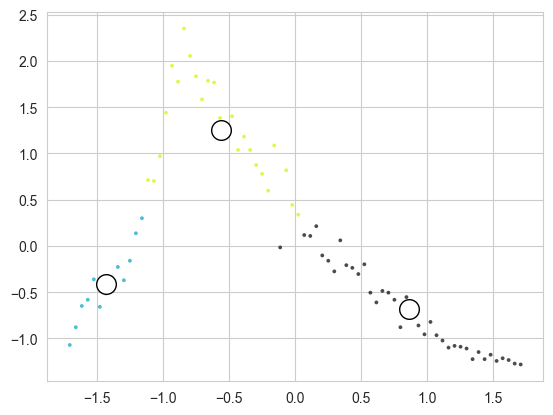

In [67]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

colors = cm.nipy_spectral(clustered.astype(float) / best_n)
plt.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)
centers = km.cluster_centers_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)
plt.show()

In [71]:
bur_centers = bur_scaler.inverse_transform(centers[:, 0].reshape(-1, 1))[:, 0]

In [73]:
from pretty_midi import PrettyMIDI
pm = PrettyMIDI(r'C:\Python Projects\jazz-jitter-analysis\data\raw\avmanip_output\trial_2\Warm-Up\Warm-Up 2 - 120 BPM\06-Drums - Live-220705_1214.mid')
pm.estimate_tempo()

181.88000971581246